# Try tsfresh

* tsfresh rolling ts: https://tsfresh.readthedocs.io/en/latest/text/forecasting.html
  * rolling ts settings: https://tsfresh.readthedocs.io/en/latest/api/tsfresh.utilities.html
* All features: https://tsfresh.readthedocs.io/en/latest/text/list_of_features.html
  * tsfresh <b>feature calculators</b>: https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html
* tsfresh <b>feature extraction choices</b>: https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_extraction.html#module-tsfresh.feature_extraction.settings
* tsfresh <b>params settings for feature generation</b>: https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html
* How to add your customized features: https://tsfresh.readthedocs.io/en/latest/text/how_to_add_custom_feature.html
  * Git pull request is not mandatory, but you need to modify tsfresh source code
  
### Summary
* Tried feature generation in expanding & rolling windows, without bring in lookahead
* Besides select default feature extraction lists, you can also specify your own list of features
* To add customized features, need to update tsfresh code in:
  * https://github.com/blue-yonder/tsfresh/blob/main/tsfresh/feature_extraction/feature_calculators.py
  * https://github.com/blue-yonder/tsfresh/blob/main/tsfresh/feature_extraction/settings.py

In [1]:
import pandas as pd

In [2]:
# mock up ts data

df = pd.DataFrame({
   "group": ['a', 'a', 'a', 'a', 'a', 'a', 'a', 'b', 'b', 'b', 'b', 'b'],
   "time": [1, 2, 3, 4, 5, 6, 7, 1, 2, 3, 4, 5],
   "x": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
   "y": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24],
})

df

,group,time,x,y
0,a,1,1,2
1,a,2,3,4
2,a,3,5,6
3,a,4,7,8
4,a,5,9,10
5,a,6,11,12
6,a,7,13,14
7,b,1,15,16
8,b,2,17,18
9,b,3,19,20


### Generate features for rolling & expanding windows
* `roll_time_series`
  * By default it's expanding window
  * For rolling window, set `max_timeshift` value and make sure it's positive (forward moving) to avoid lookahead
* In this case, I need to shift y when appending y to generated ts features 
  
#### Expanding Window

In [25]:
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh import extract_features

# expanding window
df_expanded = roll_time_series(df, column_id="group", column_sort="time")

df_expanded

Rolling: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:06<00:00,  1.05it/s]


,group,time,x,y,id
0,a,1,1,2,"(a, 1)"
2,a,1,1,2,"(a, 2)"
3,a,2,3,4,"(a, 2)"
6,a,1,1,2,"(a, 3)"
7,a,2,3,4,"(a, 3)"
8,a,3,5,6,"(a, 3)"
28,a,1,1,2,"(a, 4)"
29,a,2,3,4,"(a, 4)"
30,a,3,5,6,"(a, 4)"
31,a,4,7,8,"(a, 4)"


In [26]:
df_expanded_features = extract_features(df_expanded[['id', 'time', 'x']], column_id="id", column_sort="time")

df_expanded_features

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 12/12 [00:07<00:00,  1.70it/s]


x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
a 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         1.0                   0.0   
  4                                         1.0                   0.0   
  5                                         1.0                   0.0   
  6                                         1.0                   0.0   
  7                                         1.0                   0.0   
b 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         1.0                   0.0   
  4                                         1.0                   0.0   
  5                                         1.0                   0.0   

     x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
a 1                   0.0               0.0            1.0            1.0   
  2                   0.0               0.0            4.0           10.0   
  3                   0.0               0.0            9.0           35.0   
  4                   0.0               0.0           16.0           84.0   
  5                   0.0               0.0           25.0          165.0   
  6                   0.0               0.0           36.0          286.0   
  7                   0.0               0.0           49.0          455.0   
b 1                   0.0               0.0           15.0          225.0   
  2                   0.0               0.0           32.0          514.0   
  3                   0.0               0.0           51.0          875.0   
  4                   0.0               0.0           72.0         1316.0   
  5                   0.0               0.0           95.0         1845.0   

     x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
a 1                 NaN             NaN                                NaN   
  2                 2.0             2.0                                NaN   
  3                 2.0             2.0                                0.0   
  4                 2.0             2.0                                0.0   
  5                 2.0             2.0                                0.0   
  6                 2.0             2.0                                0.0   
  7                 2.0             2.0                                0.0   
b 1                 NaN             NaN                                NaN   
  2                 2.0             2.0                                NaN   
  3                 2.0             2.0                                0.0   
  4                 2.0             2.0                                0.0   
  5                 2.0             2.0                                0.0   

     x__median  ...  x__fourier_entropy__bins_2  x__fourier_entropy__bins_3  \
a 1        1.0  ...                         NaN                         NaN   
  2        2.0  ...                   -0.000000                   -0.000000   
  3        3.0  ...                    0.693147                    0.693147   
  4        4.0  ...                    0.636514                    1.098612   
  5        5.0  ...                    0.636514                    0.636514   
  6        6.0  ...                    0.562335                    0.562335   
  7        7.0  ...                    0.562335                    0.562335   
b 1       15.0  ...                         NaN                         NaN   
  2       16.0  ...                   -0.000000                   -0.000000   
  3       17.0  ...                    0.693147                    0.693147   
  4       18.0  ...                    0.636514                    1.098612   
  5       19.0  ...                    0.636514                    0.636514   

     x__fo

In [27]:
df_expanded_features = df_expanded_features.reset_index()

df_expanded_features

,level_0,level_1,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,...,x__fourier_entropy__bins_2,x__fourier_entropy__bins_3,x__fourier_entropy__bins_5,x__fourier_entropy__bins_10,x__fourier_entropy__bins_100,x__permutation_entropy__dimension_3__tau_1,x__permutation_entropy__dimension_4__tau_1,x__permutation_entropy__dimension_5__tau_1,x__permutation_entropy__dimension_6__tau_1,x__permutation_entropy__dimension_7__tau_1
0,a,1,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a,2,0.0,0.0,0.0,0.0,4.0,10.0,2.0,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN
2,a,3,1.0,0.0,0.0,0.0,9.0,35.0,2.0,2.0,...,0.693147,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN
3,a,4,1.0,0.0,0.0,0.0,16.0,84.0,2.0,2.0,...,0.636514,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN
4,a,5,1.0,0.0,0.0,0.0,25.0,165.0,2.0,2.0,...,0.636514,0.636514,1.098612,1.098612,1.098612,-0.0,-0.0,-0.0,NaN,NaN
5,a,6,1.0,0.0,0.0,0.0,36.0,286.0,2.0,2.0,...,0.562335,0.562335,1.039721,1.039721,1.386294,-0.0,-0.0,-0.0,-0.0,NaN
6,a,7,1.0,0.0,0.0,0.0,49.0,455.0,2.0,2.0,...,0.562335,0.562335,0.562335,1.039721,1.386294,-0.0,-0.0,-0.0,-0.0,-0.0
7,b,1,0.0,0.0,0.0,0.0,15.0,225.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,b,2,0.0,0.0,0.0,0.0,32.0,514.0,2.0,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN
9,b,3,1.0,0.0,0.0,0.0,51.0,875.0,2.0,2.0,...,0.693147,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN


In [28]:
# Append y to generated features
y_df = df[['group', 'y']].groupby('group').shift()

df_expanded_features['y'] = y_df['y']
df_expanded_features = df_expanded_features.drop(['level_0', 'level_1'], axis=1)

df_expanded_features

,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,x__mean_second_derivative_central,x__median,...,x__fourier_entropy__bins_3,x__fourier_entropy__bins_5,x__fourier_entropy__bins_10,x__fourier_entropy__bins_100,x__permutation_entropy__dimension_3__tau_1,x__permutation_entropy__dimension_4__tau_1,x__permutation_entropy__dimension_5__tau_1,x__permutation_entropy__dimension_6__tau_1,x__permutation_entropy__dimension_7__tau_1,y
0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,4.0,10.0,2.0,2.0,NaN,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,0.0,0.0,0.0,9.0,35.0,2.0,2.0,0.0,3.0,...,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN,4.0
3,1.0,0.0,0.0,0.0,16.0,84.0,2.0,2.0,0.0,4.0,...,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN,6.0
4,1.0,0.0,0.0,0.0,25.0,165.0,2.0,2.0,0.0,5.0,...,0.636514,1.098612,1.098612,1.098612,-0.0,-0.0,-0.0,NaN,NaN,8.0
5,1.0,0.0,0.0,0.0,36.0,286.0,2.0,2.0,0.0,6.0,...,0.562335,1.039721,1.039721,1.386294,-0.0,-0.0,-0.0,-0.0,NaN,10.0
6,1.0,0.0,0.0,0.0,49.0,455.0,2.0,2.0,0.0,7.0,...,0.562335,0.562335,1.039721,1.386294,-0.0,-0.0,-0.0,-0.0,-0.0,12.0
7,0.0,0.0,0.0,0.0,15.0,225.0,NaN,NaN,NaN,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,32.0,514.0,2.0,2.0,NaN,16.0,...,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,16.0
9,1.0,0.0,0.0,0.0,51.0,875.0,2.0,2.0,0.0,17.0,...,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN,18.0


#### Rolling Window

In [4]:
# rolling windod
df_rolled= roll_time_series(df, column_id="group", column_sort="time", max_timeshift=3)

df_rolled

Rolling: 100%|███████████████████████████████████████████████████████████████████████████| 7/7 [00:02<00:00,  2.60it/s]


,group,time,x,y,id
0,a,1,1,2,"(a, 1)"
2,a,1,1,2,"(a, 2)"
3,a,2,3,4,"(a, 2)"
6,a,1,1,2,"(a, 3)"
7,a,2,3,4,"(a, 3)"
8,a,3,5,6,"(a, 3)"
12,a,1,1,2,"(a, 4)"
13,a,2,3,4,"(a, 4)"
14,a,3,5,6,"(a, 4)"
15,a,4,7,8,"(a, 4)"


In [32]:
df_rolled_features = extract_features(df_rolled[['id', 'time', 'x']], column_id="id", column_sort="time")

df_rolled_features



Feature Extraction:   0%|                                                                       | 0/12 [00:00<?, ?it/s]

Feature Extraction:   8%|█████▎                                                         | 1/12 [00:02<00:28,  2.57s/it]

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.34it/s]


x__variance_larger_than_standard_deviation  x__has_duplicate_max  \
a 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         1.0                   0.0   
  4                                         1.0                   0.0   
  5                                         1.0                   0.0   
  6                                         1.0                   0.0   
  7                                         1.0                   0.0   
b 1                                         0.0                   0.0   
  2                                         0.0                   0.0   
  3                                         1.0                   0.0   
  4                                         1.0                   0.0   
  5                                         1.0                   0.0   

     x__has_duplicate_min  x__has_duplicate  x__sum_values  x__abs_energy  \
a 1                   0.0               0.0            1.0            1.0   
  2                   0.0               0.0            4.0           10.0   
  3                   0.0               0.0            9.0           35.0   
  4                   0.0               0.0           16.0           84.0   
  5                   0.0               0.0           24.0          164.0   
  6                   0.0               0.0           32.0          276.0   
  7                   0.0               0.0           40.0          420.0   
b 1                   0.0               0.0           15.0          225.0   
  2                   0.0               0.0           32.0          514.0   
  3                   0.0               0.0           51.0          875.0   
  4                   0.0               0.0           72.0         1316.0   
  5                   0.0               0.0           80.0         1620.0   

     x__mean_abs_change  x__mean_change  x__mean_second_derivative_central  \
a 1                 NaN             NaN                                NaN   
  2                 2.0             2.0                                NaN   
  3                 2.0             2.0                                0.0   
  4                 2.0             2.0                                0.0   
  5                 2.0             2.0                                0.0   
  6                 2.0             2.0                                0.0   
  7                 2.0             2.0                                0.0   
b 1                 NaN             NaN                                NaN   
  2                 2.0             2.0                                NaN   
  3                 2.0             2.0                                0.0   
  4                 2.0             2.0                                0.0   
  5                 2.0             2.0                                0.0   

     x__median  ...  x__fourier_entropy__bins_2  x__fourier_entropy__bins_3  \
a 1        1.0  ...                         NaN                         NaN   
  2        2.0  ...                   -0.000000                   -0.000000   
  3        3.0  ...                    0.693147                    0.693147   
  4        4.0  ...                    0.636514                    1.098612   
  5        6.0  ...                    0.636514                    1.098612   
  6        8.0  ...                    0.636514                    1.098612   
  7       10.0  ...                    0.636514                    1.098612   
b 1       15.0  ...                         NaN                         NaN   
  2       16.0  ...                   -0.000000                   -0.000000   
  3       17.0  ...                    0.693147                    0.693147   
  4       18.0  ...                    0.636514                    1.098612   
  5       20.0  ...                    0.636514                    1.098612   

     x__fo

In [33]:
df_rolled

,group,time,x,y,id
0,a,1,1,2,"(a, 1)"
2,a,1,1,2,"(a, 2)"
3,a,2,3,4,"(a, 2)"
6,a,1,1,2,"(a, 3)"
7,a,2,3,4,"(a, 3)"
8,a,3,5,6,"(a, 3)"
12,a,1,1,2,"(a, 4)"
13,a,2,3,4,"(a, 4)"
14,a,3,5,6,"(a, 4)"
15,a,4,7,8,"(a, 4)"


In [70]:
df_rolled_features = df_rolled_features.reset_index()

df_rolled_features

,level_0,level_1,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,...,x__fourier_entropy__bins_2,x__fourier_entropy__bins_3,x__fourier_entropy__bins_5,x__fourier_entropy__bins_10,x__fourier_entropy__bins_100,x__permutation_entropy__dimension_3__tau_1,x__permutation_entropy__dimension_4__tau_1,x__permutation_entropy__dimension_5__tau_1,x__permutation_entropy__dimension_6__tau_1,x__permutation_entropy__dimension_7__tau_1
0,a,1,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a,2,0.0,0.0,0.0,0.0,4.0,10.0,2.0,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN
2,a,3,1.0,0.0,0.0,0.0,9.0,35.0,2.0,2.0,...,0.693147,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN
3,a,4,1.0,0.0,0.0,0.0,16.0,84.0,2.0,2.0,...,0.636514,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN
4,a,5,1.0,0.0,0.0,0.0,24.0,164.0,2.0,2.0,...,0.636514,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN
5,a,6,1.0,0.0,0.0,0.0,32.0,276.0,2.0,2.0,...,0.636514,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN
6,a,7,1.0,0.0,0.0,0.0,40.0,420.0,2.0,2.0,...,0.636514,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN
7,b,1,0.0,0.0,0.0,0.0,15.0,225.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,b,2,0.0,0.0,0.0,0.0,32.0,514.0,2.0,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN
9,b,3,1.0,0.0,0.0,0.0,51.0,875.0,2.0,2.0,...,0.693147,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN


In [73]:
# Append y to generated features
y_df = df[['group', 'y']].groupby('group').shift()

df_rolled_features['y'] = y_df['y']

df_rolled_features = df_rolled_features.drop(['level_0', 'level_1'], axis=1)
df_rolled_features.head()

,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,x__mean_second_derivative_central,x__median,...,x__fourier_entropy__bins_3,x__fourier_entropy__bins_5,x__fourier_entropy__bins_10,x__fourier_entropy__bins_100,x__permutation_entropy__dimension_3__tau_1,x__permutation_entropy__dimension_4__tau_1,x__permutation_entropy__dimension_5__tau_1,x__permutation_entropy__dimension_6__tau_1,x__permutation_entropy__dimension_7__tau_1,y
0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,4.0,10.0,2.0,2.0,NaN,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,0.0,0.0,0.0,9.0,35.0,2.0,2.0,0.0,3.0,...,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN,4.0
3,1.0,0.0,0.0,0.0,16.0,84.0,2.0,2.0,0.0,4.0,...,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN,6.0
4,1.0,0.0,0.0,0.0,24.0,164.0,2.0,2.0,0.0,6.0,...,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN,8.0


#### Generate Specified Features

In [11]:
df_rolled_features_test = extract_features(df_rolled[['id', 'time', 'x']], column_id="id", column_sort="time",
                                          default_fc_parameters = {
                                            "length": None,
                                            "hanhan_test_feature": None,
                                            "large_standard_deviation": [{"r": 0.05}, {"r": 0.1}],
                                        })

df_rolled_features_test

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.59it/s]


x__length        x__hanhan_test_feature  \
a 1        1.0                        [10.0]   
  2        2.0                  [10.0, 30.0]   
  3        3.0            [10.0, 30.0, 50.0]   
  4        4.0      [10.0, 30.0, 50.0, 70.0]   
  5        4.0      [30.0, 50.0, 70.0, 90.0]   
  6        4.0     [50.0, 70.0, 90.0, 110.0]   
  7        4.0    [70.0, 90.0, 110.0, 130.0]   
b 1        1.0                       [150.0]   
  2        2.0                [150.0, 170.0]   
  3        3.0         [150.0, 170.0, 190.0]   
  4        4.0  [150.0, 170.0, 190.0, 210.0]   
  5        4.0  [170.0, 190.0, 210.0, 230.0]   

     x__large_standard_deviation__r_0.05  x__large_standard_deviation__r_0.1  
a 1                                  0.0                                 0.0  
  2                                  1.0                                 1.0  
  3                                  1.0                                 1.0  
  4                                  1.0                                 1.0  
  5                                  1.0                                 1.0  
  6                                  1.0                                 1.0  
  7                                  1.0                                 1.0  
b 1                                  0.0                                 0.0  
  2                                  1.0                                 1.0  
  3                                  1.0                                 1.0  
  4                                  1.0                                 1.0  
  5                                  1.0                                 1.0

#### DIY Feature

* You need to update tsfresh source code to do this
* Follow this guidance, no need to send Git pull request: https://tsfresh.readthedocs.io/en/latest/text/how_to_add_custom_feature.html
  * Find your local `tsfresh` code by typing `pip show tsfresh` and modify the code there
  * You DIF feature implementation should be in `feature_calculators.py`: https://github.com/blue-yonder/tsfresh/blob/main/tsfresh/feature_extraction/feature_calculators.py
  * To add your DIY feature in a list, add it in `settings.py`: https://github.com/blue-yonder/tsfresh/blob/main/tsfresh/feature_extraction/settings.py

In [5]:
from tsfresh.feature_extraction import ComprehensiveFCParameters

In [9]:
settings = ComprehensiveFCParameters()

df_rolled_features_test = extract_features(df_rolled[['id', 'time', 'x']], column_id="id", column_sort="time",
                                          default_fc_parameters=settings)

df_rolled_features_test

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.18it/s]


x__hanhan_test_feature  x__variance_larger_than_standard_deviation  \
a 1                        [10.0]                                         0.0   
  2                  [10.0, 30.0]                                         0.0   
  3            [10.0, 30.0, 50.0]                                         1.0   
  4      [10.0, 30.0, 50.0, 70.0]                                         1.0   
  5      [30.0, 50.0, 70.0, 90.0]                                         1.0   
  6     [50.0, 70.0, 90.0, 110.0]                                         1.0   
  7    [70.0, 90.0, 110.0, 130.0]                                         1.0   
b 1                       [150.0]                                         0.0   
  2                [150.0, 170.0]                                         0.0   
  3         [150.0, 170.0, 190.0]                                         1.0   
  4  [150.0, 170.0, 190.0, 210.0]                                         1.0   
  5  [170.0, 190.0, 210.0, 230.0]                                         1.0   

     x__has_duplicate_max  x__has_duplicate_min  x__has_duplicate  \
a 1                   0.0                   0.0               0.0   
  2                   0.0                   0.0               0.0   
  3                   0.0                   0.0               0.0   
  4                   0.0                   0.0               0.0   
  5                   0.0                   0.0               0.0   
  6                   0.0                   0.0               0.0   
  7                   0.0                   0.0               0.0   
b 1                   0.0                   0.0               0.0   
  2                   0.0                   0.0               0.0   
  3                   0.0                   0.0               0.0   
  4                   0.0                   0.0               0.0   
  5                   0.0                   0.0               0.0   

     x__sum_values  x__abs_energy  x__mean_abs_change  x__mean_change  \
a 1            1.0            1.0                 NaN             NaN   
  2            4.0           10.0                 2.0             2.0   
  3            9.0           35.0                 2.0             2.0   
  4           16.0           84.0                 2.0             2.0   
  5           24.0          164.0                 2.0             2.0   
  6           32.0          276.0                 2.0             2.0   
  7           40.0          420.0                 2.0             2.0   
b 1           15.0          225.0                 NaN             NaN   
  2           32.0          514.0                 2.0             2.0   
  3           51.0          875.0                 2.0             2.0   
  4           72.0         1316.0                 2.0             2.0   
  5           80.0         1620.0                 2.0             2.0   

     x__mean_second_derivative_central  ...  x__fourier_entropy__bins_2  \
a 1                                NaN  ...                         NaN   
  2                                NaN  ...                   -0.000000   
  3                                0.0  ...                    0.693147   
  4                                0.0  ...                    0.636514   
  5                                0.0  ...                    0.636514   
  6                                0.0  ...                    0.636514   
  7                                0.0  ...                    0.636514   
b 1                                NaN  ...                         NaN   
  2                                NaN  ...                   -0.000000   
  3                                0.0  ...                    0.693147   
  4                                0.0  ...                    0.636514   
  5                                0.0  ...                    0.636514   

     x__fourier_entropy__bins_3  x__fourier_entropy__bins_5  \
a 1                         NaN                         NaN   
  2    

## tsfresh Built-in Feature Selection

* tsfresh feature selection module: https://tsfresh.readthedocs.io/en/latest/api/tsfresh.feature_selection.html
  * For every feature the influence on the target is evaluated by an univariate tests and the p-Value is calculated
  * It uses Benjamini Hochberg procedure to decide which features to keep solely based on p-value
  * `H_0 = the Feature is not relevant and should not be added`
    * When p-value is smaller than `FDR_LEVEL`, reject H0 and the feature will be kept
  * It supports both real number and binary number targets
    * When the feature is binary, you can choose between `Mann-Whitney-U` test (`mann`) and `Kolmogorov-Smirnov` test (`smir`)
* What is <b>Benjamini–Hochberg procedure</b>
  * https://www.statisticshowto.com/benjamini-hochberg-procedure/#:~:text=What%20is%20the%20Benjamini%2DHochberg,reject%20the%20true%20null%20hypotheses.

In [40]:
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh import defaults

FDR_LEVEL = defaults.FDR_LEVEL
HYPOTHESES_INDEPENDENT = defaults.HYPOTHESES_INDEPENDENT

In [29]:
df_expanded_features.head()

,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,x__mean_second_derivative_central,x__median,...,x__fourier_entropy__bins_3,x__fourier_entropy__bins_5,x__fourier_entropy__bins_10,x__fourier_entropy__bins_100,x__permutation_entropy__dimension_3__tau_1,x__permutation_entropy__dimension_4__tau_1,x__permutation_entropy__dimension_5__tau_1,x__permutation_entropy__dimension_6__tau_1,x__permutation_entropy__dimension_7__tau_1,y
0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,4.0,10.0,2.0,2.0,NaN,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,2.0
2,1.0,0.0,0.0,0.0,9.0,35.0,2.0,2.0,0.0,3.0,...,0.693147,0.693147,0.693147,0.693147,-0.0,NaN,NaN,NaN,NaN,4.0
3,1.0,0.0,0.0,0.0,16.0,84.0,2.0,2.0,0.0,4.0,...,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,NaN,NaN,NaN,6.0
4,1.0,0.0,0.0,0.0,25.0,165.0,2.0,2.0,0.0,5.0,...,0.636514,1.098612,1.098612,1.098612,-0.0,-0.0,-0.0,NaN,NaN,8.0


In [30]:
df_features = df_expanded_features.fillna(0)  # neither feature not target could contain null when using tsfresh feature selection

In [31]:
y = df_features['y']

X = df_features.drop('y', axis=1)

X.head()

,x__variance_larger_than_standard_deviation,x__has_duplicate_max,x__has_duplicate_min,x__has_duplicate,x__sum_values,x__abs_energy,x__mean_abs_change,x__mean_change,x__mean_second_derivative_central,x__median,...,x__fourier_entropy__bins_2,x__fourier_entropy__bins_3,x__fourier_entropy__bins_5,x__fourier_entropy__bins_10,x__fourier_entropy__bins_100,x__permutation_entropy__dimension_3__tau_1,x__permutation_entropy__dimension_4__tau_1,x__permutation_entropy__dimension_5__tau_1,x__permutation_entropy__dimension_6__tau_1,x__permutation_entropy__dimension_7__tau_1
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,4.0,10.0,2.0,2.0,0.0,2.0,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,9.0,35.0,2.0,2.0,0.0,3.0,...,0.693147,0.693147,0.693147,0.693147,0.693147,-0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,16.0,84.0,2.0,2.0,0.0,4.0,...,0.636514,1.098612,1.098612,1.098612,1.098612,-0.0,-0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,25.0,165.0,2.0,2.0,0.0,5.0,...,0.636514,0.636514,1.098612,1.098612,1.098612,-0.0,-0.0,-0.0,0.0,0.0


In [32]:
df_pvalues = calculate_relevance_table(X, y, test_for_real_target_real_feature='kendall', test_for_real_target_binary_feature='mann')

df_pvalues.head()

,feature,type,p_value,relevant
feature,,,,
"x__cwt_coefficients__coeff_1__w_20__widths_(2, 5, 10, 20)","x__cwt_coefficients__coeff_1__w_20__widths_(2,...",real,0.000048,True
"x__cwt_coefficients__coeff_1__w_10__widths_(2, 5, 10, 20)","x__cwt_coefficients__coeff_1__w_10__widths_(2,...",real,0.000048,True
"x__cwt_coefficients__coeff_1__w_5__widths_(2, 5, 10, 20)","x__cwt_coefficients__coeff_1__w_5__widths_(2, ...",real,0.000048,True
x__sum_values,x__sum_values,real,0.000089,True
x__abs_energy,x__abs_energy,real,0.000089,True


In [37]:
print("# total \t", len(df_pvalues))
print("# relevant \t", (df_pvalues["relevant"] == True).sum())
print("# irrelevant \t", (df_pvalues["relevant"] == False).sum(), "( # constant", (df_pvalues["type"] == "const").sum(), ")")

# total 	 779
# relevant 	 25
# irrelevant 	 754 ( # constant 0 )


In [41]:
def calc_rejection_line(df_pvalues, hypothesis_independent, fdr_level):
    
    m = len(df_pvalues.loc[~(df_pvalues.type == "const")])
    K = list(range(1, m + 1))
    
    if hypothesis_independent:
        C = [1] * m
    else:
        C = [sum([1.0 / k for k in K])] * m

    return [fdr_level * k / m * 1.0 / c for k, c in zip(K, C)]

In [43]:
rejection_line = calc_rejection_line(df_pvalues, HYPOTHESES_INDEPENDENT, FDR_LEVEL)

rejection_line[0:10]

[8.870373068135391e-06,
 1.7740746136270783e-05,
 2.6611119204406176e-05,
 3.5481492272541566e-05,
 4.435186534067695e-05,
 5.322223840881235e-05,
 6.209261147694774e-05,
 7.096298454508313e-05,
 7.983335761321852e-05,
 8.87037306813539e-05]

[]

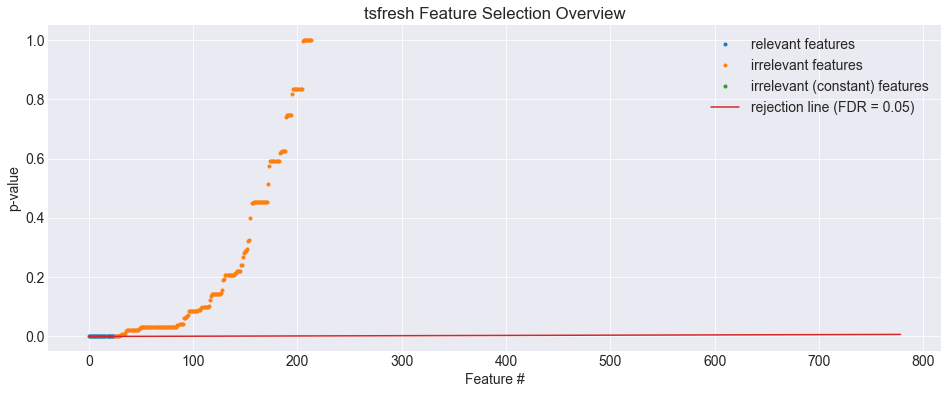

In [47]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = [16, 6]
matplotlib.rcParams["font.size"] = 14
matplotlib.style.use('seaborn-darkgrid')


df_pvalues.index = pd.Series(range(0, len(df_pvalues.index)))

df_pvalues.p_value.where(df_pvalues.relevant).plot(style=".", label="relevant features")

df_pvalues.p_value.where(~df_pvalues.relevant & (df_pvalues.type != "const")).plot(style=".", label="irrelevant features")

df_pvalues.p_value.fillna(1).where(df_pvalues.type == "const").plot(style=".", label="irrelevant (constant) features")

plt.plot(rejection_line, label="rejection line (FDR = " + str(FDR_LEVEL) + ")")
plt.xlabel("Feature #")
plt.ylabel("p-value")
plt.title("tsfresh Feature Selection Overview")
plt.legend()
plt.plot()

[]

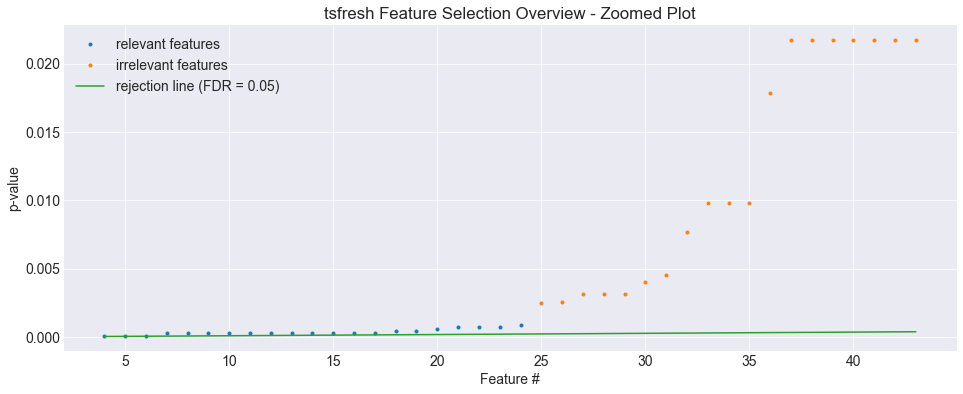

In [49]:
import numpy as np

last_rejected_index = (df_pvalues["relevant"] == True).sum() - 1
margin = 20
a = max(last_rejected_index - margin, 0)
b = min(last_rejected_index + margin, len(df_pvalues) - 1)

df_pvalues[a:b].p_value.where(df_pvalues[a:b].relevant)\
    .plot(style=".", label="relevant features")
df_pvalues[a:b].p_value.where(~df_pvalues[a:b].relevant)\
    .plot(style=".", label="irrelevant features")
plt.plot(np.arange(a, b), rejection_line[a:b], label="rejection line (FDR = " + str(FDR_LEVEL) + ")")
plt.xlabel("Feature #")
plt.ylabel("p-value")
plt.title("tsfresh Feature Selection Overview - Zoomed Plot")
plt.legend()
plt.plot()